In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import gensim
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer

from umap import UMAP




In [4]:
def visualise_model_param_eval(df_news, df_tweets, param_name):
    # Create a figure with 2 columns and 3 rows
    fig, axs = plt.subplots(3, 2, figsize=(10, 10))
    palette = ["r", "b", "y", "k"]

    # Plot data1 in the first column
    if df_news is not None:
        sns.lineplot(data=df_news, x=param_name, y='topic_diversity', hue="model_name", ax=axs[0][0], palette=palette)
        sns.lineplot(data=df_news, x=param_name, y='topic_coherence_npmi', hue="model_name", ax=axs[1][0], palette=palette)
        sns.lineplot(data=df_news, x=param_name, y='topic_coherence_umass', hue="model_name", ax=axs[2][0], palette=palette)

    # Plot data2 in the second column
    if df_tweets is not None:
        sns.lineplot(data=df_tweets, x=param_name, y='topic_diversity', hue="model_name", ax=axs[0][1], palette=palette)
        sns.lineplot(data=df_tweets, x=param_name, y='topic_coherence_npmi', hue="model_name", ax=axs[1][1], palette=palette)
        sns.lineplot(data=df_tweets, x=param_name, y='topic_coherence_umass', hue="model_name", ax=axs[2][1], palette=palette)

    # Show the plot
    plt.tight_layout()
    plt.show()


## num_topics evaluation

ValueError: Could not interpret value `num_topics` for parameter `x`

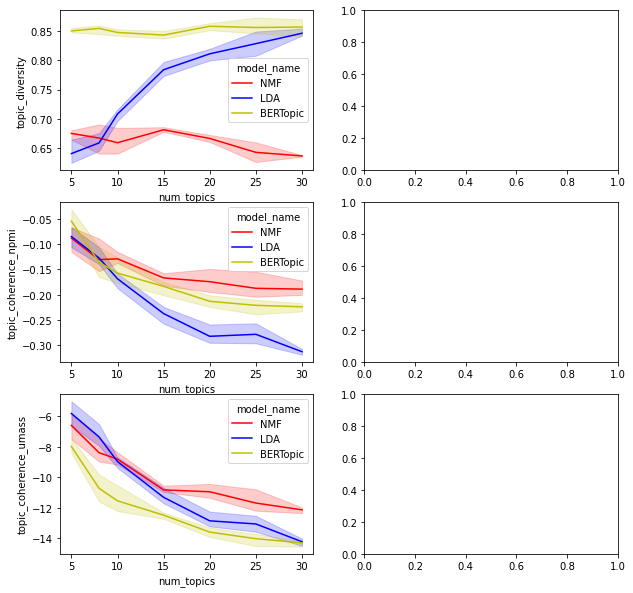

In [3]:
from gensim.corpora import Dictionary
NUM_SAMPLES = 5000
ROOT_PATH = '/home/jhladnik/'
df_news = pd.read_csv(f"{ROOT_PATH}/masters-thesis/notebooks/news_results_{NUM_SAMPLES}.csv")

visualise_model_param_eval(df_news, None, param_name="num_topics")

ValueError: Could not interpret value `num_topics` for parameter `x`

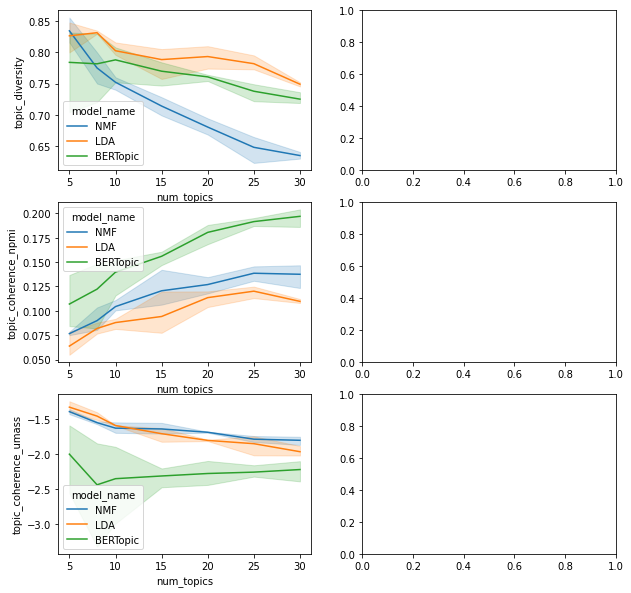

In [22]:
NUM_SAMPLES = 50000
ROOT_PATH = '/home/jhladnik/'
df_news = pd.read_csv(f"{ROOT_PATH}/masters-thesis/notebooks/news_results_{NUM_SAMPLES}.csv")

visualise_model_param_eval(df_news, None, param_name="num_topics")

### with top2vec

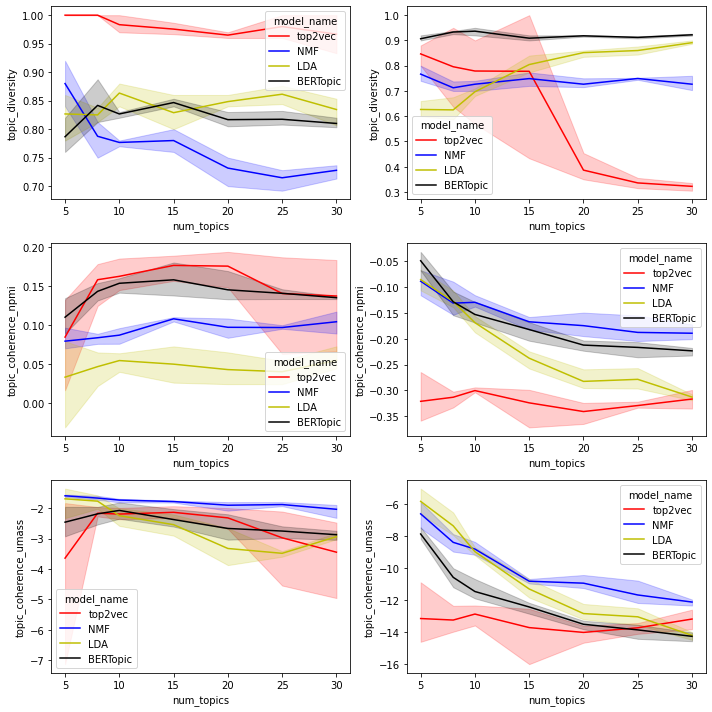

In [14]:
NUM_SAMPLES = 5000
ROOT_PATH = '/home/jhladnik/'

df_news = pd.read_csv(f"{ROOT_PATH}/masters-thesis/notebooks/num_topics_all_models_nnwords=10_news_{NUM_SAMPLES}.csv")
df_tweets = pd.read_csv(f"{ROOT_PATH}/masters-thesis/notebooks/num_topics_all_models_nnwords=10_tweets_{NUM_SAMPLES}.csv")

visualise_model_param_eval(df_news, df_tweets, param_name="num_topics")

#### topic words

In [44]:
import ast
for model_name in ["NMF", "LDA", "BERTopic"]:
    print(model_name)
    df_it = df_news[(df_news.model_name==model_name) & (df_news.num_topics==10) & (df_news.seed==1)].reset_index()
    for topic in ast.literal_eval(df_it.loc[0, "topic_representations"]):
        print(" ".join(topic))


NMF
Ljubljana Nbsp Slovenija slovenski ura minister konferenca nov predsednik mednaroden
imeti človek čas zato življenje otrok iti vedeti pomemben videti
delo vlada čas epidemija ukrep deloven stranka zaposlen Slovenija delavec
država Slovenija evropski predsednik vlada slovenski imeti komisija stranka političen
občina zaprt ura nadaljnji center mesten številka javen pošta uraden
tekma sezona mesto liga nov ekipa točka klub zmaga imeti
evro podjetje odstotek milijon Slovenija družba nov projekt cena zaposlen
ukrep javen občina otrok sporazum nadomestilo prireditev uporaba plačilo šola
nov okužba koronavirus človek covid število potrditi okužen ukrep bolnik
zavod pogodba oprema imeti maska ventilator posel zaščiten postopek količina
LDA
tekma sezona liga imeti mesto ekipa klub točka nov igralec
ZDA predsednik ameriški Trump volitev država kolesar glas nekdanji ruski
vozilo cesta voda avtomobil območje voznik prostor objekt del električen
evro Slovenija evropski podjetje milijon država d

In [45]:
for model_name in ["NMF", "LDA", "BERTopic"]:
    print(model_name)
    df_it = df_tweets[(df_tweets.model_name==model_name) & (df_tweets.num_topics==10) & (df_tweets.seed==1)].reset_index()
    for topic in ast.literal_eval(df_it.loc[0, "topic_representations"]):
        print(" ".join(topic))

NMF
čas Janša Janez stranka delo problem dobiti videti političen SDS
človek minister zato cepljenje narediti del priti doza cepljen treba
Slovenija svet nov stranka novinar republika evropski cepljenje Evropa demokracija
slovenski delati videti reči narod novinar medij znati meja praviti
dati misliti denar treba cepiti javen potreben začeti mir cepljenje
iti denar reči videti zato šola razumeti gledati star povedati
vlada predsednik ukrep Janša volitev odločitev lev kriv predlog poslanec
vedeti priti povedati dobiti delati treba Janša obstajati volitev držati
država nov predsednik otrok dr. zakon praven ustaven covid Pahor
imeti priti doza novinar povedati doma otrok težava slo. reči
LDA
iti čas umreti imeti praviti priti človek dobiti slovenski očitno
imeti iti razumeti narediti zato povedati delati komunist človek poslanec
vedeti imeti takrat kul človek nov koalicija edin cepljenje levica
imeti test meja delo Slovenija država hiter mesto sodstvo covid
imeti denar dati hvala iti vlada

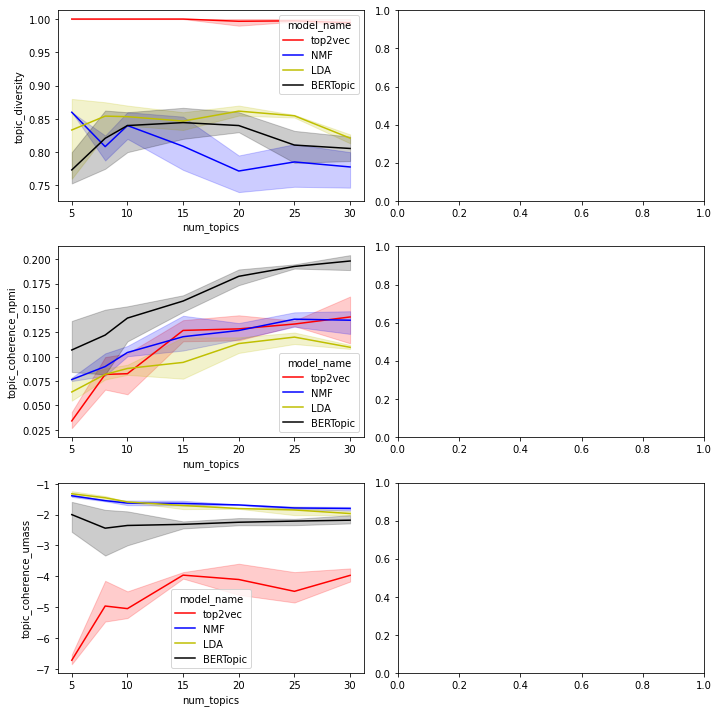

In [8]:
NUM_SAMPLES = 50000
ROOT_PATH = '/home/jhladnik'

df_news = pd.read_csv(f"{ROOT_PATH}/masters-thesis/results/num_topics_all_models_nnwords=10_news_{NUM_SAMPLES}.csv")
#df_tweets = pd.read_csv(f"{ROOT_PATH}/masters-thesis/results/num_topics_all_models_nnwords=10_tweets_{NUM_SAMPLES}.csv")

visualise_model_param_eval(df_news, None, param_name="num_topics")

#### topic words

In [ ]:
import ast
topic_rep_words = ast.literal_eval(df_news.loc[1, "topic_representations"])

for topic in topic_rep_words:
    print(" ".join(topic))

## top_n_words

ValueError: Could not interpret value `top_n_words` for parameter `x`

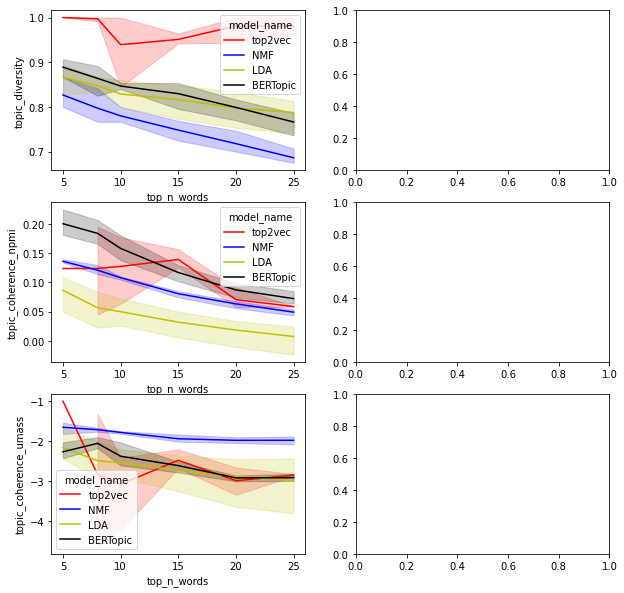

In [15]:
NUM_SAMPLES = 5000
ROOT_PATH = '/home/jhladnik/'
df_news = pd.read_csv(f"{ROOT_PATH}masters-thesis/notebooks/top_n_words_models_news_{NUM_SAMPLES}.csv")
#df_tweets = pd.read_csv(f"{ROOT_PATH}masters-thesis/notebooks/top_n_words_models_tweets_{NUM_SAMPLES}.csv")
visualise_model_param_eval(df_news, None, param_name="top_n_words")

## num docouments


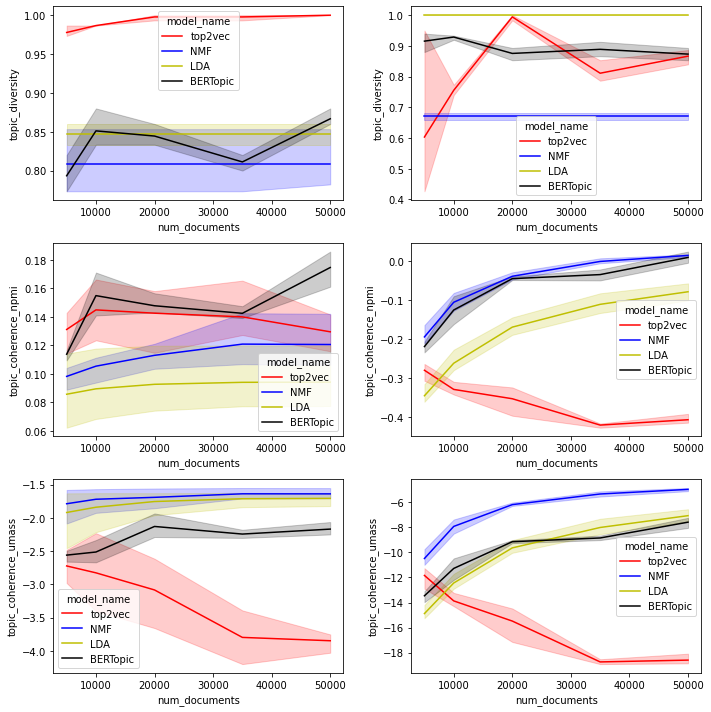

In [6]:
NUM_SAMPLES = 50000
ROOT_PATH = '/home/jhladnik/'
df_news = pd.read_csv(f"{ROOT_PATH}/masters-thesis/notebooks/num_documents_models_news_{NUM_SAMPLES}.csv")
df_tweets = pd.read_csv(f"{ROOT_PATH}/masters-thesis/notebooks/num_documents_models_tweets_{NUM_SAMPLES}.csv")

visualise_model_param_eval(df_news, df_tweets, param_name="num_documents")

### different docs and different seed

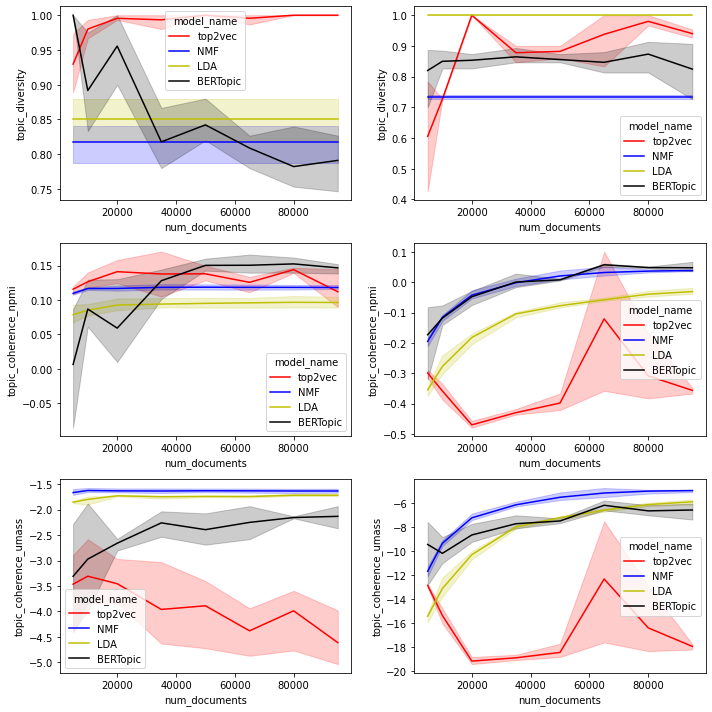

In [3]:
NUM_SAMPLES = 300_000
ROOT_PATH = '/home/jhladnik/'
df_news = pd.read_csv(f"{ROOT_PATH}masters-thesis/notebooks/num_documents_models_news_{NUM_SAMPLES}_sampled_docs.csv")
df_tweets = pd.read_csv(f"{ROOT_PATH}masters-thesis/notebooks/num_documents_models_tweets_{NUM_SAMPLES}_sampled_docs.csv")
visualise_model_param_eval(df_news, df_tweets, param_name="num_documents")

### only different seeds, same documents

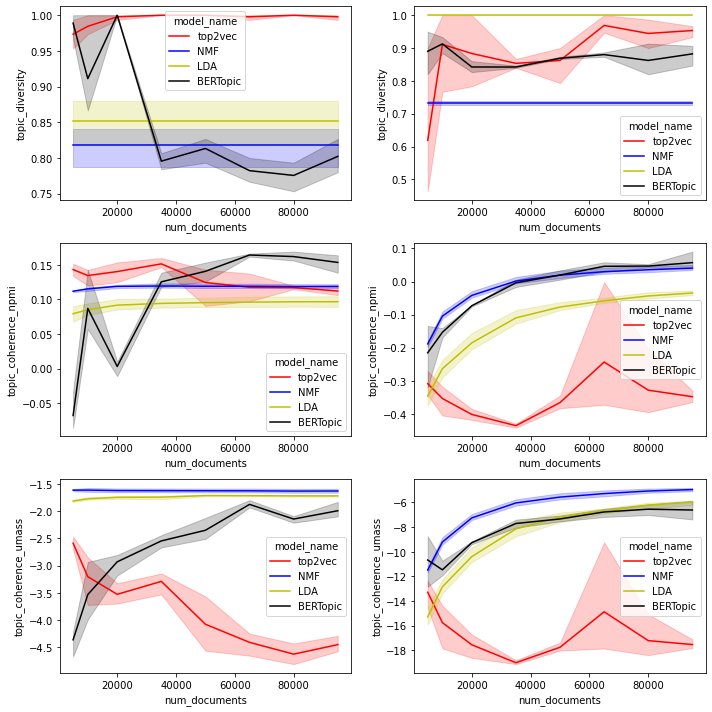

In [10]:
NUM_SAMPLES = 300_000
ROOT_PATH = '/home/jhladnik/'
df_news = pd.read_csv(f"{ROOT_PATH}masters-thesis/notebooks/num_documents_models_news_{NUM_SAMPLES}.csv")
df_tweets = pd.read_csv(f"{ROOT_PATH}masters-thesis/notebooks/num_documents_models_tweets_{NUM_SAMPLES}.csv")
visualise_model_param_eval(df_news, df_tweets, param_name="num_documents")

In [ ]:
figx = pickle.load(open(f"{ROOT_PATH}masters-thesis/results/plots/num_documents_eval.pickle", 'rb'))

figx.suptitle("Number of documents")
plt.tight_layout()

figx.show() # Show the figure, edit it, etc.!

In [24]:
import ast
from evaluation import get_models_topic_words

topic_words = get_models_topic_words(df_tweets, "BERTopic", "num_documents", 50000, 2, verbose=False)

In [22]:
topic_words_LDA_2 = get_models_topic_words(df_tweets, "LDA", "num_documents", 50000, 2, verbose=False)
topic_words_LDA_1 = get_models_topic_words(df_tweets, "LDA", "num_documents", 50000, 1, verbose=False)

In [23]:
topic_words_BERTopic_2 = get_models_topic_words(df_tweets, "BERTopic", "num_documents", 50000, 2, verbose=False)
topic_words_BERTopic_1 = get_models_topic_words(df_tweets, "BERTopic", "num_documents", 50000, 1, verbose=False)

In [28]:
from evaluation import get_maximum_topic_matching
topic_matchings = get_maximum_topic_matching(topic_words_BERTopic_1, topic_words_LDA_2, "jaccard")

pd.DataFrame(topic_matchings, columns=["topic_model_1_topics", "topic_model_2_topics", "similarity"])



,topic_model_1_topics,topic_model_2_topics,similarity
0,"[imeti, vlada, nov, človek, iti, država, preds...","[imeti, iti, človek, država, čas, vedeti, svet...",0.428571
1,"[slovenija, slovenski, slovenec, ljubljana, im...","[slovenski, treba, zdravstven, kultura, narod,...",0.111111
2,"[evro, denar, eur, plača, milijon, plačati, po...","[javen, Ljubljana, RTV, denar, hvala, zakon, d...",0.052632
3,"[novinar, medij, medijski, novinarka, novinars...","[medij, maska, novinar, konec, via, oblast, le...",0.111111
4,"[zdravnik, zdravstven, zdravstvo, dr, bolnišni...","[politika, slo., smrt, komunist, podatek, znat...",0.000000
5,"[otrok, šola, učitelj, starš, šolski, družina,...","[delo, verjeti, izjava, služba, prispevek, sta...",0.052632
6,"[koronavirus, virus, okužba, nov, ukrep, širje...","[ukrep, epidemija, narediti, virus, vprašanje,...",0.176471
7,"[protest, protestnik, kolesar, protestirati, p...","[vlada, minister, predsednik, Janša, priti, dr...",0.052632
8,"[epidemija, okužba, okužen, število, covid, uk...","[Slovenija, nov, covid, koronavirus, mesto, ev...",0.333333
9,"[opozicija, političen, stranka, koalicija, pol...","[stranka, poslanec, praviti, lev, levica, mili...",0.111111


In [18]:
topic_matchings[-4]

(['cerkev',
  'bog',
  'papež',
  'janez',
  'jezus',
  'molitev',
  'občina',
  'verski',
  'svet',
  'katoliški'],
 ['cerkev',
  'bog',
  'papež',
  'jezus',
  'molitev',
  'občina',
  'svet',
  'verski',
  'katoliški',
  'božji'],
 0.8181818181818182)

In [43]:
import ast
from evaluation import get_models_topic_words



topic_words = get_models_topic_words(df_tweets, "top2vec", "num_documents", 50000, 2, verbose=True)

faktor celo eksplozija papez roman znak bravo zapisati korona nacionalen
moc tozba pocutiti nasilje nameniti hrvaski prebivalstvo nauciti ivanretvita pripeljati
normalen nastopiti hrvat organ kocevski neumen obnasati pregon odkriti podatek
eksplozija goreti povrsina pogasiti meter spregledati pozar objekt pgd blizina
piti zemlja ustvariti ivanretvita nsi dohodek samozaposlen prebivalstvo kpk letnica
padati sarcev sporocilo umrl okuziti prihodnost nvo napisati primoz globok
razloziti pravilno odkriti preprican nastopiti poslanka kocevski gregor hrvat razlicen
pocitnice tovaris intelektualec npu kordis ocitati obsoditi jokati razloziti kam
puska scena haha bazen zarota sarcev padati normalen gobec pregon
gledalec ilegalen poklic pooblastilo voditelj status karl zarota cestitati bozicen
skrajno namen pocutiti spregledati bitka rtvs avto pravnik financiranje skrajen
nameniti komentirati naloga naprej skrajno slovenka veselinovic mnozica promovirati jokati
posiljati naprej temeljen nebo pog

In [39]:
topic_words

[['faktor',
  'celo',
  'eksplozija',
  'papez',
  'roman',
  'znak',
  'bravo',
  'zapisati',
  'korona',
  'nacionalen'],
 ['moc',
  'tozba',
  'pocutiti',
  'nasilje',
  'nameniti',
  'hrvaski',
  'prebivalstvo',
  'nauciti',
  'ivanretvita',
  'pripeljati'],
 ['normalen',
  'nastopiti',
  'hrvat',
  'organ',
  'kocevski',
  'neumen',
  'obnasati',
  'pregon',
  'odkriti',
  'podatek'],
 ['eksplozija',
  'goreti',
  'povrsina',
  'pogasiti',
  'meter',
  'spregledati',
  'pozar',
  'objekt',
  'pgd',
  'blizina'],
 ['piti',
  'zemlja',
  'ustvariti',
  'ivanretvita',
  'nsi',
  'dohodek',
  'samozaposlen',
  'prebivalstvo',
  'kpk',
  'letnica'],
 ['padati',
  'sarcev',
  'sporocilo',
  'umrl',
  'okuziti',
  'prihodnost',
  'nvo',
  'napisati',
  'primoz',
  'globok'],
 ['razloziti',
  'pravilno',
  'odkriti',
  'preprican',
  'nastopiti',
  'poslanka',
  'kocevski',
  'gregor',
  'hrvat',
  'razlicen'],
 ['pocitnice',
  'tovaris',
  'intelektualec',
  'npu',
  'kordis',
  'ocitati

In [19]:
from evaluation import get_maximum_topic_matching
topic_matchings = get_maximum_topic_matching(topic_words_LDA_1, topic_words_LDA_2, "jaccard")


In [26]:
pd.DataFrame(topic_matchings, columns=["topic_model_1_topics", "topic_model_2_topics", "similarity"])

,topic_model_1_topics,topic_model_2_topics,similarity
0,"[ura, teden, pravica, komunist, čakati, verjet...","[medij, maska, novinar, konec, via, oblast, le...",0.052632
1,"[protest, hvala, današnji, levičar, pogledati,...","[dr., teden, podpora, napad, Rtv, hud, intervj...",0.111111
2,"[mesto, sodišče, občina, levica, smrt, kultura...","[pomoč, občina, oseba, dom, prebrati, spomniti...",0.111111
3,"[milijon, podjetje, vojna, zaščiten, zdeti, sp...","[slovenski, treba, zdravstven, kultura, narod,...",0.052632
4,"[povedati, priti, Slovenec, misliti, praviti, ...","[Slovenec, Evropa, zgodovina, vprašati, mogoč,...",0.052632
5,"[dobiti, novinar, RTV, slo., treba, upati, pro...","[javen, Ljubljana, RTV, denar, hvala, zakon, d...",0.052632
6,"[nov, okužba, gledati, zakon, rdeč, zanimiv, v...","[Slovenija, nov, covid, koronavirus, mesto, ev...",0.176471
7,"[iti, zato, reči, narediti, volitev, via, lev,...","[stranka, poslanec, praviti, lev, levica, mili...",0.111111
8,"[svet, stranka, Ljubljana, pomoč, poslanec, vp...","[ukrep, epidemija, narediti, virus, vprašanje,...",0.111111
9,"[meja, oddaja, zdravnik, služba, direktor, pot...","[delo, verjeti, izjava, služba, prispevek, sta...",0.111111


# evaluation of bertopic params

In [5]:
def visualise_bertopic_param_eval(df_news, df_tweets, param_name):
    # Create a figure with 2 columns and 3 rows
    fig, axs = plt.subplots(3, 2, figsize=(10, 10))

    # Plot data1 in the first column
    sns.lineplot(data=df_news, x=param_name, y='topic_diversity', ax=axs[0][0])
    sns.lineplot(data=df_news, x=param_name, y='topic_coherence_npmi', ax=axs[1][0])
    sns.lineplot(data=df_news, x=param_name, y='topic_coherence_umass', ax=axs[2][0])

    # Plot data2 in the second column
    sns.lineplot(data=df_tweets, x=param_name, y='topic_diversity', ax=axs[0][1])
    sns.lineplot(data=df_tweets, x=param_name, y='topic_coherence_npmi', ax=axs[1][1])
    sns.lineplot(data=df_tweets, x=param_name, y='topic_coherence_umass', ax=axs[2][1])

    # Show the plot
    plt.tight_layout()
    plt.show()

### min_df

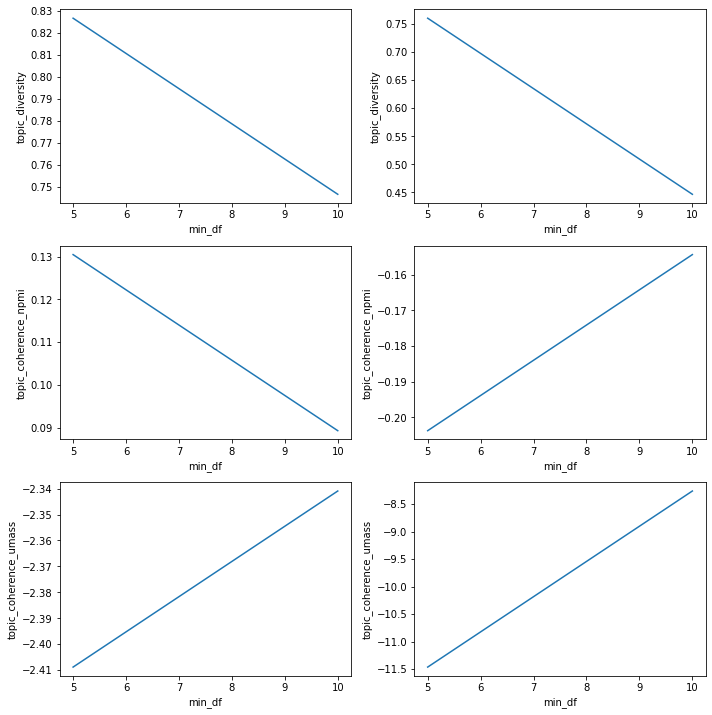

In [8]:
NUM_SAMPLES = 5000
ROOT_PATH = '/home/jhladnik/'
df_news = pd.read_csv(f"{ROOT_PATH}masters-thesis/notebooks/min_df_results_news_{NUM_SAMPLES}.csv")
df_tweets = pd.read_csv(f"{ROOT_PATH}masters-thesis/notebooks/min_df_results_tweets_{NUM_SAMPLES}.csv")
visualise_bertopic_param_eval(df_news, df_tweets, "min_df")

In [ ]:
NUM_SAMPLES = 50000
ROOT_PATH = '/home/jhladnik/'
df_news = pd.read_csv(f"{ROOT_PATH}masters-thesis/notebooks/news_min_df_results_{NUM_SAMPLES}.csv")
df_tweets = pd.read_csv(f"{ROOT_PATH}masters-thesis/notebooks/tweets_min_df_results_{NUM_SAMPLES}.csv")
visualise_bertopic_param_eval(df_news, df_tweets, "min_df")


### n_neighbors

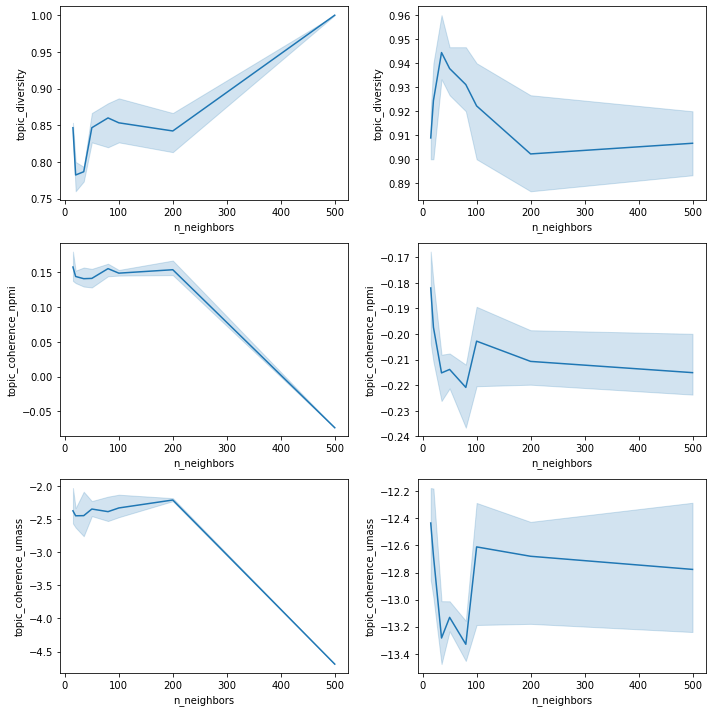

In [23]:
NUM_SAMPLES = 5000
ROOT_PATH = '/home/jhladnik/'
df_news = pd.read_csv(f"{ROOT_PATH}masters-thesis/notebooks/n_neighbors_results_news_{NUM_SAMPLES}.csv")
df_tweets = pd.read_csv(f"{ROOT_PATH}masters-thesis/notebooks/n_neighbors_results_tweets_{NUM_SAMPLES}.csv")
visualise_bertopic_param_eval(df_news, df_tweets, "n_neighbors")

### min_topic_size

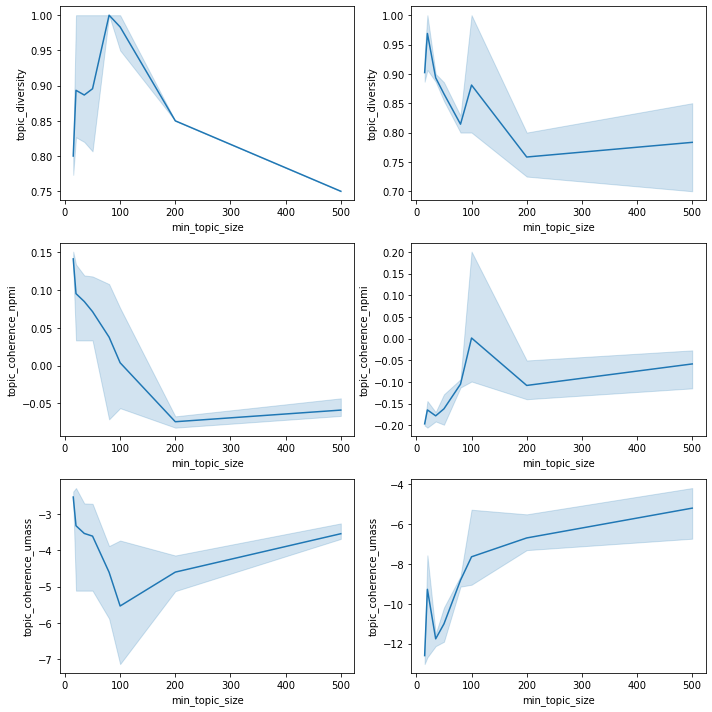

In [6]:
NUM_SAMPLES = 5000
ROOT_PATH = '/home/jhladnik/'
df_news = pd.read_csv(f"{ROOT_PATH}masters-thesis/notebooks/min_topic_size_results_news_{NUM_SAMPLES}.csv")
df_tweets = pd.read_csv(f"{ROOT_PATH}masters-thesis/notebooks/min_topic_size_results_tweets_{NUM_SAMPLES}.csv")
visualise_bertopic_param_eval(df_news, df_tweets, "min_topic_size")

In [12]:
import ast
topic_rep_words = ast.literal_eval(df_news.loc[1, "topic_representations"])

for topic in topic_rep_words:
    print(" ".join(topic))

nov imeti slovenija čas delo ukrep država človek vlada slovenski
policist policijski policija voznik nesreča vozilo prometen dejanje uprava vožnja
okužba bolnik nov bolnišnica covid koronavirus okužen potrditi zdravstven število
okužba koronavirus država nov kitajski človek število umreti potrditi okužen
trump biden zda ameriški predsednik volitev trumpov donald glas predsedniški
film oddaja imeti igralec igralka življenje instagram povedati vloga čas
življenje ljubezen imeti čas partner odnos zato otrok človek ženska
tekma liga nba miami točka dončić dallas košarkar dragić luka
oblačen pretežno temperatura stopinja celzij nevihta veter jasno padavina jasen
stranka desus vlada koalicija volitev predsednik poslanec smc odstotek poslanski
telefon piškotek spleten uporabnik mobilen računalnik naprava pameten aplikacija omrežje
evropski komisija unija dogovor bruselj članica država pogajanje sveženj kriza
avtomobil električen vozilo cena model audi motor tron evro sistem
slovenski predsedn

In [13]:
import ast
topic_rep_words = ast.literal_eval(df_tweets.loc[1, "topic_representations"])

for topic in topic_rep_words:
    print(" ".join(topic))

imeti človek vedeti iti čas vlada minister nov priti dati
volitev voda stranka sds referendum političen glasovati volilec koalicija imeti
cepljenje cepivo cepljen covid test cepiti obvezen pcr pozitiven imeti
denar plača iti imeti delo davek cena plačati plačevati dobiti
otrok šola učitelj starš mlad testirati učenec imeti osnoven učiti
sodišče sodnik ustaven sodstvo praven zakon ustava pravosodje vrhoven soden
novinar medij medijski novinarski napad novinarstvo poročati imeti hiša novinarka
pravilno imeti profil normalen veljati poslati zgoditi jasen strava sveder
komunist komunističen komunizem oblast kuba žrtev kul komunistično titoist naslednik
zdravnik pacient bolnik zdravstvo bolnišnica covid dr medicinski sestra bolnica
hvala sreča čestitka čestitati ponosen srečno odlično milost prijatelj imeti
fašist nacist fašizem neonacist hitler nacizem diktator skrajen fašističen totalitaren
vlada država delati državen skrajnost sektor lockdown začasnost sestavljati dolgo
rdeč problem okov

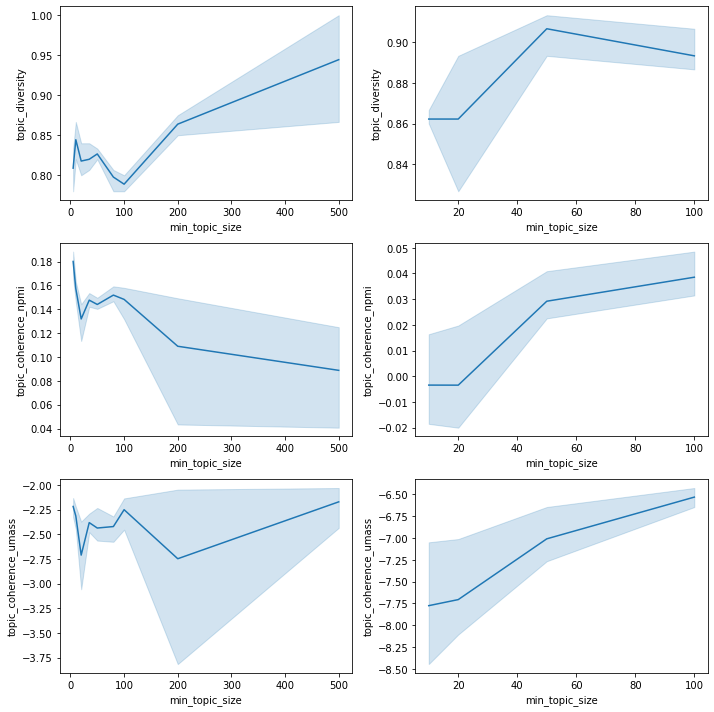

In [10]:
NUM_SAMPLES = 50000
ROOT_PATH = '/home/jhladnik/'
df_news = pd.read_csv(f"{ROOT_PATH}masters-thesis/notebooks/min_topic_size_results_news_{NUM_SAMPLES}.csv")
df_tweets = pd.read_csv(f"{ROOT_PATH}masters-thesis/notebooks/min_topic_size_results_tweets_{NUM_SAMPLES}.csv")
visualise_bertopic_param_eval(df_news, df_tweets, "min_topic_size")


### top_n_words

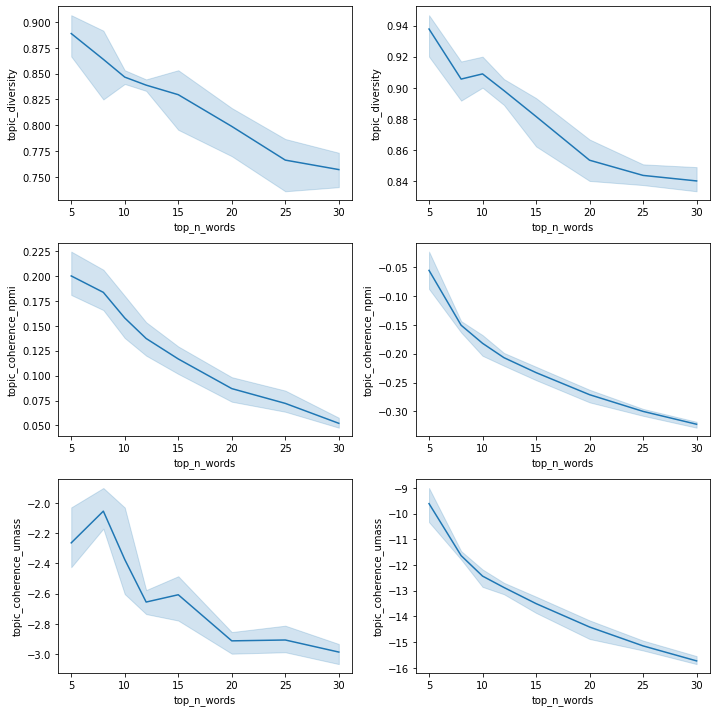

In [11]:
NUM_SAMPLES = 5000
ROOT_PATH = '/home/jhladnik/'
df_news = pd.read_csv(f"{ROOT_PATH}masters-thesis/notebooks/news_top_n_words_results_{NUM_SAMPLES}.csv")
df_tweets = pd.read_csv(f"{ROOT_PATH}masters-thesis/notebooks/tweets_top_n_words_results_{NUM_SAMPLES}.csv")
visualise_bertopic_param_eval(df_news, df_tweets, "top_n_words")

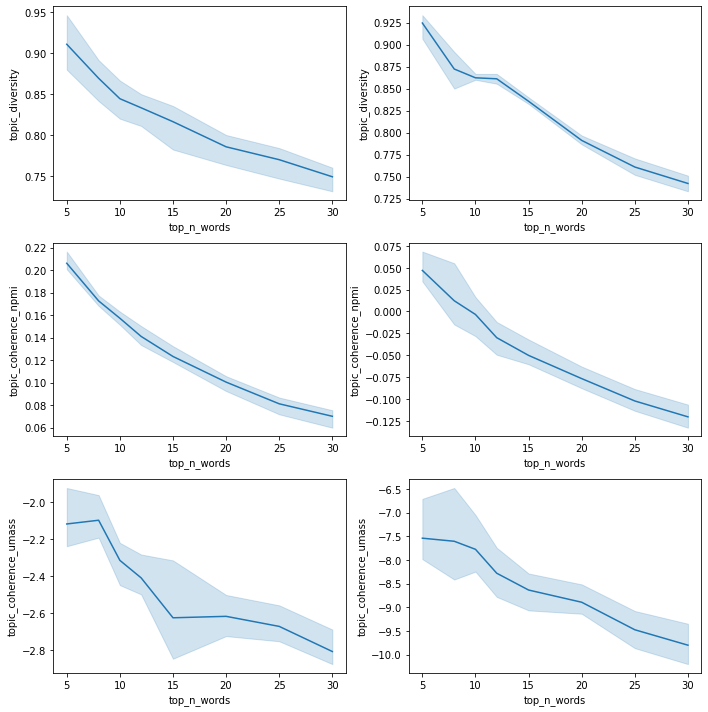

In [24]:
NUM_SAMPLES = 50000
ROOT_PATH = '/home/jhladnik/'
df_news = pd.read_csv(f"{ROOT_PATH}masters-thesis/notebooks/news_top_n_words_results_{NUM_SAMPLES}.csv")
df_tweets = pd.read_csv(f"{ROOT_PATH}masters-thesis/notebooks/tweets_top_n_words_results_{NUM_SAMPLES}.csv")
visualise_bertopic_param_eval(df_news, df_tweets, "top_n_words")


### n_gram_range

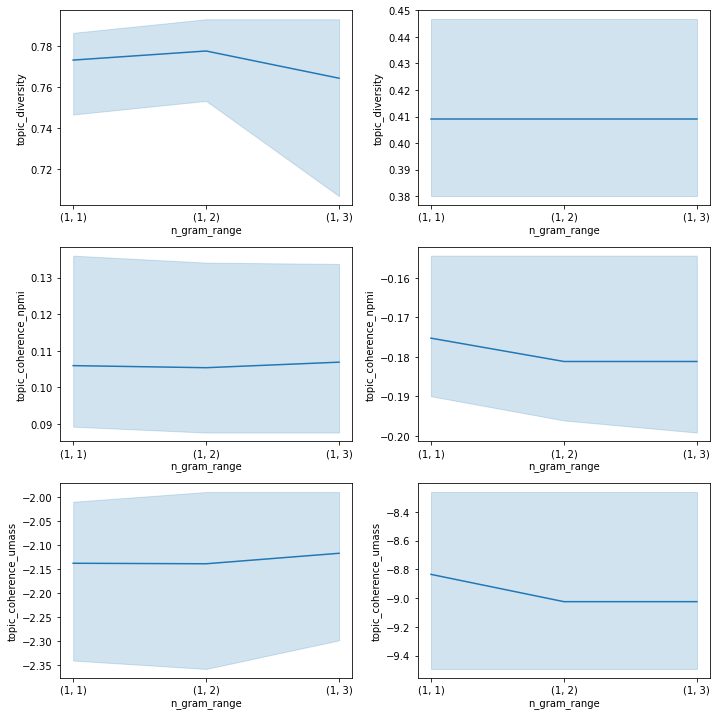

In [12]:
NUM_SAMPLES = 5000
ROOT_PATH = '/home/jhladnik/'
df_news = pd.read_csv(f"{ROOT_PATH}masters-thesis/notebooks/n_gram_range_results_news_{NUM_SAMPLES}.csv")
df_tweets = pd.read_csv(f"{ROOT_PATH}masters-thesis/notebooks/n_gram_range_results_tweets_{NUM_SAMPLES}.csv")
visualise_bertopic_param_eval(df_news, df_tweets, "n_gram_range")

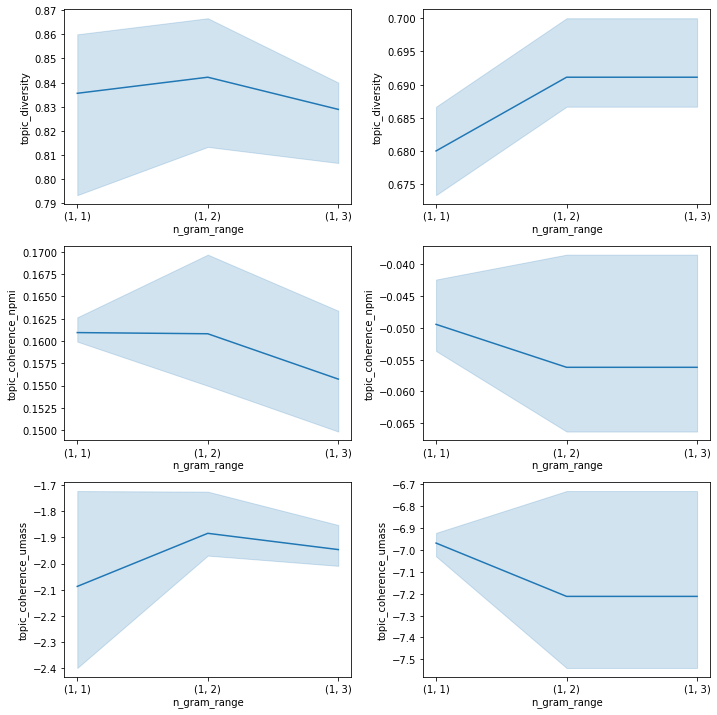

In [13]:
NUM_SAMPLES = 50000
ROOT_PATH = '/home/jhladnik/'
df_news = pd.read_csv(f"{ROOT_PATH}masters-thesis/notebooks/n_gram_range_results_news_{NUM_SAMPLES}.csv")
df_tweets = pd.read_csv(f"{ROOT_PATH}masters-thesis/notebooks/n_gram_range_results_tweets_{NUM_SAMPLES}.csv")
visualise_bertopic_param_eval(df_news, df_tweets, "n_gram_range")